# Examen 1 - Modelos probabilísticos - Práctico.

![](https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg)


Referencias:
- Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
- [Ames Housing dataset](https://www.amstat.org/publications/jse/v19n3/decock.pdf)
___

## 1. Selección de características según Lasso

Supongamos que decidimos ajustar un modelo de regresión lineal a un conjunto de datos $(X, y)$, usando la regularización tipo Lasso ($L^1$).

Un hecho ampliamente conocido es que al aumentar lo suficiente el coeficiente de regularización, algunos coeficientes se empiezan a hacer cero. Este hecho ha motivado el uso de este esquema para elegir características en el siguiente modo:

1. Se entrena el modelo para varios valores de coeficientes de regularización.
2. Se obtienen los coeficientes relativos a cada variable.
3. Los coeficientes que primero se hacen cero, son indicativo de variables "con menos poder predictivo".

A continuación un ejemplo con nuestros datos de precios de casas:

In [1]:
# Importamos librerías
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Lectura de datos
data = pd.read_csv("housing_prices.csv")
data.head()

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
# Entrenamos modelos para diferentes valores de coeficiente de regularización, y obtenemos coeficientes
reg_coefs = np.logspace(0, 5, 30)
coefs_size = []
coefs_nb = []
for a in reg_coefs:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Lasso(alpha=a))
    ])
    model.fit(X=data[["size", "n_bedrooms"]], y=data["price"])
    coefs_size.append(np.abs(model.named_steps["reg"].coef_[0]))
    coefs_nb.append(np.abs(model.named_steps["reg"].coef_[1]))

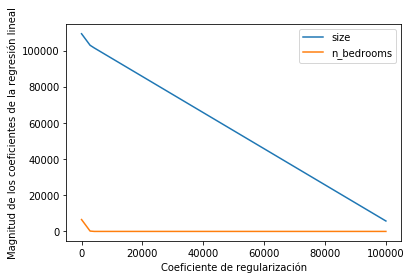

In [6]:
# Graficamos
plt.plot(reg_coefs, coefs_size, label="size")
plt.plot(reg_coefs, coefs_nb, label="n_bedrooms")
plt.xlabel("Coeficiente de regularización")
plt.ylabel("Magnitud de los coeficientes de la regresión lineal")
plt.legend()

Observamos que el coeficiente de `n_bedrooms` se hace cero bastante rápido. Por tanto, si tuviéramos que elegir solo una característica para explicar los precios de las casas, deberíamos de elegir `size`.

Usando esta idea, la aplicaremos al [conjunto de datos de calidad de vinos](https://archive.ics.uci.edu/ml/datasets/wine+quality). Leer el archivo `winequality.names`.

Variables explicativas (basadas en pruebas físico-químicas):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Variable de respuesta:

12. quality (score between 0 and 10)

Alternativamente, pueden aplicar la idea sobre [este conjunto de datos de precios de bienes raices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

Determinar:

1. El orden de poder predictivo de las variables, según Lasso.

2. Si tuvieran que elegir solo 5 variables para el modelo, ¿Cuáles elegirían?

3. Partir los datos en datos de entrenamiento y datos de prueba, y entrenar el modelo con las 5 variables seleccionadas sobre los datos de entrenamiento. ¿Cuál es el $R^2$ de su modelo?, ¿Cuál es el $R^2$ de un modelo usando todas las 11 variables explicativas? Concluir.

## 2. Regresión lineal Bayesiana

Usando los mismos datos de **calidad de vino o bienes raices**, aplicar la técnica de regresión lineal Bayesiana, como vimos en clase, para estimar la distribución posterior de los parámetros, suponiendo una previa normal:

$$
P(w) = \mathcal{N}(w | 0, \alpha^{-1} I),
$$

Recuerde que usted debe proponer los valores para $\alpha$ y $\beta$.

Determine:

1. La media de la distribución posterior. ¿Cuáles son los valores más probables de los parámetros?

2. La matriz de covarianza de la distribución posterior.

3. Simular 1000 valores conjuntos de los parámetros, y calcular la estimación de calidad con cada uno de ellos para los siguientes valores:

| fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| 7.4   | 0.7   | 0     | 1.9   | 0.076 | 11    | 34    | 0.9978| 3.51  | 0.56 	| 9.4   |

   - ¿Cuál es la calidad máxima estimada?, ¿Cuál es el percentil 95%?
   - ¿Cuál es la calidad mínima estimada?, ¿Cuál es el percentil 5%?

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>